In [4]:
# 04/14/2020
# Aline Jaimes

# Analysis
#   Background. Moisture affects irradiance sensor and affects data quality
# It is worse when snow covers the panel because it is basically
# moisture in transition period (Dew/Fog).
#   Goal. Analyze moisture in the air.
# From those parameters temperature/ humidity/pressure/ 
# Determine the probable status or dew point.
# Come up with some opinion about the probabily 
# that the moisture in the air is condensed(fog, mist, dew)
#
# Dewpoint calculation
#Historical_OWS_Data.csv


In [1]:
# 1. Import dependencies
import os
import csv
import sys
import math
import pyowm
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy import stats
import string as string
from datetime import time
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Read data from source
link = 'http://history.openweathermap.org/storage/35acbd5930dfa0c93a57a10fd3b385f4.csv'
# Read file
df = pd.read_csv(link)


In [3]:
df.weather_main

0         Clear
1         Clear
2        Clouds
3        Clouds
4        Clouds
          ...  
47618      Snow
47619      Rain
47620      Snow
47621      Rain
47622    Clouds
Name: weather_main, Length: 47623, dtype: object

In [4]:
df.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'sea_level',
       'grnd_level', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'weather_icon'],
      dtype='object')

In [39]:
# Create a group based on the values in the 'weather description' column
clouds_all = df.groupby('clouds_all')
## Count how weather description are in a group
count_clouds_all = clouds_all['clouds_all'].count()
count_clouds_all

clouds_all
0         77
1      22380
3          3
4          2
5         10
6          3
7          3
8          1
9          2
11         3
12         2
13         1
16         3
17         1
19         2
20      1552
22         1
25         1
26         1
31         1
33         1
36         1
40      2758
42         3
43         1
47         1
48         1
49         3
50         1
53         3
60         2
61         1
64         1
74         1
75      3498
78         1
79         1
82         2
84         1
86         2
87         1
88         5
89         1
90     17206
93         7
94         1
96         5
97         5
98         7
99         7
100       46
Name: clouds_all, dtype: int64

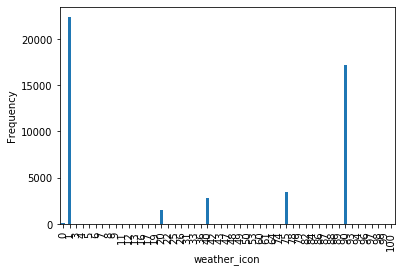

In [40]:
## Create a bar chart based off of the group series from before
count_clouds_all_type= count_clouds_all.plot(kind='bar')
## Set the xlabel and ylabel using class methods
count_clouds_all_type.set_xlabel("weather_icon")
count_clouds_all_type.set_ylabel("Frequency")
plt.show()
#plt.tight_layout()

In [37]:
# Create a group based on the values in the 'weather description' column
weather_iconClasses = df.groupby('weather_icon')
## Count how weather description are in a group
count_weather_icon = weather_iconClasses['weather_icon'].count()
count_weather_icon

weather_icon
01d    10428
01n    11382
02d     1050
02n      452
03d     1673
03n      928
04d     7267
04n     6653
09d       81
09n      137
10d     1390
10n     1018
11d      154
11n       95
13d      667
13n      829
50d     1472
50n     1947
Name: weather_icon, dtype: int64

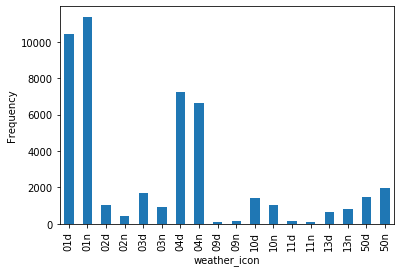

In [97]:
## Create a bar chart based off of the group series from before
count_weather_icon_type= count_weather_icon.plot(kind='bar')
## Set the xlabel and ylabel using class methods
count_weather_icon_type.set_xlabel("weather_icon")
count_weather_icon_type.set_ylabel("Frequency")
plt.show()
#plt.tight_layout()

In [7]:
# Create a group based on the values in the 'weather description' column
WeatherDescriptionClasses = df.groupby('weather_main')
## Count how weather description are in a group
count_weather_main = WeatherDescriptionClasses['weather_main'].count()
count_weather_main

weather_main
Clear           21810
Clouds          18023
Drizzle           217
Fog               246
Haze              380
Mist             2793
Rain             2409
Snow             1496
Thunderstorm      249
Name: weather_main, dtype: int64

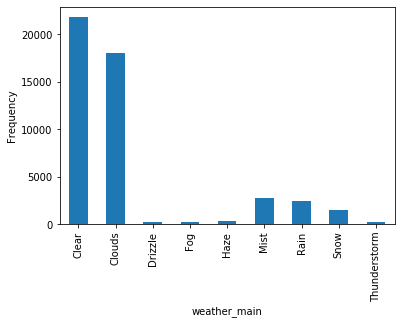

In [8]:
## Create a bar chart based off of the group series from before
count_weather_main_type= count_weather_main.plot(kind='bar')
## Set the xlabel and ylabel using class methods
count_weather_main_type.set_xlabel("weather_main")
count_weather_main_type.set_ylabel("Frequency")
plt.show()
#plt.tight_layout()

In [9]:
# Create a group based on the values in the 'weather description' column
WeatherDescriptionClasses = df1.groupby('weather_description')

NameError: name 'df1' is not defined

In [10]:
## Count how weather description are in a group
count_WeatherDescription = WeatherDescriptionClasses['weather_description'].count()
count_WeatherDescription


weather_main
Clear           21810
Clouds          18023
Drizzle           217
Fog               246
Haze              380
Mist             2793
Rain             2409
Snow             1496
Thunderstorm      249
Name: weather_description, dtype: int64

In [11]:
count_WeatherDescription.head()

weather_main
Clear      21810
Clouds     18023
Drizzle      217
Fog          246
Haze         380
Name: weather_description, dtype: int64

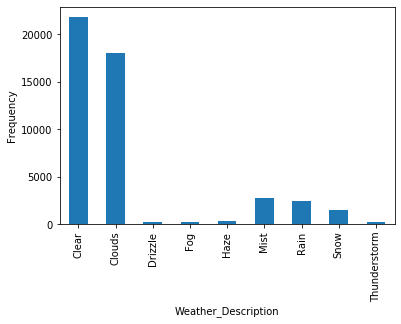

In [12]:
## Create a bar chart based off of the group series from before
count_WeatherDescription_Type= count_WeatherDescription.plot(kind='bar')

## Set the xlabel and ylabel using class methods
count_WeatherDescription_Type.set_xlabel("Weather_Description")
count_WeatherDescription_Type.set_ylabel("Frequency")
plt.show()
#plt.tight_layout()

In [13]:
# Calculate DewPoint
t_air_c=df.temp
rel_humidity=df.humidity
A = 17.27
B = 237.7
dp1=(A*df.temp)/(B+df.temp)
m=(df.humidity/100.0)
mlog=np.log2(m)
alpha=(dp1+m)
#alpha = ((A * t_air_c) / (B + t_air_c)) + math.log(rel_humidity/100.0)
dp=(B * alpha) / (A - alpha)    

In [14]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 47623 rows and 25 columns


In [15]:
df.describe()

,dt,timezone,lat,lon,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id
count,4.762300e+04,47623.000000,4.762300e+04,4.762300e+04,47623.000000,47623.000000,47623.000000,47623.000000,47623.000000,0.0,0.0,47623.000000,47623.000000,47623.000000,1321.000000,4.000000,205.000000,5.00,47623.000000,47623.000000
mean,1.503995e+09,-19316.842702,4.523447e+01,-9.348045e+01,7.488394,3.858529,6.402452,8.499089,1015.022069,NaN,NaN,68.764442,3.703436,195.445940,1.046185,0.860000,0.472585,0.13,41.680050,767.683934
std,4.834682e+07,1733.961407,1.421100e-14,1.421100e-14,12.640799,14.654864,12.691194,12.650050,8.259287,NaN,NaN,17.890851,1.923752,101.862878,1.811617,0.680735,0.374524,0.00,41.568472,91.537106
min,1.420070e+09,-21600.000000,4.523447e+01,-9.348046e+01,-33.660000,-41.070000,-36.670000,-32.780000,973.000000,NaN,NaN,11.000000,0.030000,0.000000,0.110000,0.190000,0.250000,0.13,0.000000,200.000000
25%,1.461742e+09,-21600.000000,4.523447e+01,-9.348046e+01,-1.540000,-7.010000,-2.500000,-0.890000,1010.000000,NaN,NaN,56.000000,2.100000,120.000000,0.250000,0.422500,0.250000,0.13,1.000000,800.000000
50%,1.504386e+09,-18000.000000,4.523447e+01,-9.348046e+01,7.560000,3.370000,6.500000,8.330000,1015.000000,NaN,NaN,70.000000,3.100000,190.000000,0.380000,0.750000,0.250000,0.13,20.000000,800.000000
75%,1.546198e+09,-18000.000000,4.523447e+01,-9.348046e+01,18.190000,16.730000,17.190000,19.090000,1020.000000,NaN,NaN,83.000000,4.630000,290.000000,1.020000,1.187500,0.510000,0.13,90.000000,803.000000
max,1.586819e+09,-18000.000000,4.523447e+01,-9.348046e+01,37.010000,36.830000,35.600000,38.000000,1049.000000,NaN,NaN,100.000000,20.000000,360.000000,24.300000,1.750000,2.030000,0.13,100.000000,804.000000


In [16]:
import time 
print(' start ' , time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(df['dt'].iloc[0]))))

 start  2014-12-31 18:00:00


In [17]:
time_index = pd.date_range('2014-12-31 18:00:00', periods=47623,  freq='1h')  
new=time_index

In [18]:
df1 = df.set_index(time_index)
#df1

In [19]:
df1["dt"]= new[0]
df1.head(2)

,dt,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
2014-12-31 18:00:00,2014-12-31 18:00:00,2015-01-01 00:00:00 +0000 UTC,-21600,Connexus Anoka MN,45.234472,-93.480455,-11.49,-17.83,-11.87,-11.0,...,230,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
2014-12-31 19:00:00,2014-12-31 18:00:00,2015-01-01 01:00:00 +0000 UTC,-21600,Connexus Anoka MN,45.234472,-93.480455,-11.49,-17.13,-11.88,-11.0,...,220,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n


In [20]:
dp

0        -3.354438
1        -3.354438
2        -3.243161
3        -2.683170
4        -1.749241
           ...    
47618    11.285216
47619     8.820624
47620     8.820624
47621     8.105281
47622     6.584907
Length: 47623, dtype: float64

In [21]:
df2 = df.set_index(dp)

In [22]:
new1=dp

In [23]:
df2["dt_iso"]= new1[0]
df2.head(2)

,dt,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
-3.354438,1420070400,-3.354438,-21600,Connexus Anoka MN,45.234472,-93.480455,-11.49,-17.83,-11.87,-11.0,...,230,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
-3.354438,1420074000,-3.354438,-21600,Connexus Anoka MN,45.234472,-93.480455,-11.49,-17.13,-11.88,-11.0,...,220,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n


In [24]:
df2.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'sea_level',
       'grnd_level', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'weather_icon'],
      dtype='object')

In [25]:
df3 = df2.filter(items=['dt', 'city_name', 'lat', 'lon', 'dt_iso','temp', 'feels_like', 'temp_min','temp_max','pressure','humidity','wind_speed','wind_deg','rain_1h','rain_3h','snow_1h','snow_3h','clouds_all','weather_id','weather_main','weathed_description','weather_icon'])
df3.head(2)
#weather_data.tail()

,dt,city_name,lat,lon,dt_iso,temp,feels_like,temp_min,temp_max,pressure,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_icon
-3.354438,1420070400,Connexus Anoka MN,45.234472,-93.480455,-3.354438,-11.49,-17.83,-11.87,-11.0,1018,...,4.1,230,NaN,NaN,NaN,NaN,1,800,Clear,01n
-3.354438,1420074000,Connexus Anoka MN,45.234472,-93.480455,-3.354438,-11.49,-17.13,-11.88,-11.0,1018,...,3.1,220,NaN,NaN,NaN,NaN,1,800,Clear,01n


In [26]:
df3.columns

Index(['dt', 'city_name', 'lat', 'lon', 'dt_iso', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all',
       'weather_id', 'weather_main', 'weather_icon'],
      dtype='object')

In [27]:
df3.rename(columns={
    "dt": "Datetime",
    "city_name": "CityName",
    "lat": "Latitude",
    "lon": "Longitude",
    "dt_iso":"DewPoint",
    "temp": "Temperature",
    "feels_like": "Feels_Like",
    "temp_min": "Min_Temperature",
    "temp_max": "Max_Temperature",
    "pressure": "Pressure",
    "humidity": "Humidity",
    "wind_speed": "WindSpeed",
    "rain_1h": "Rain_1h",
    "rain_3h": "Rain_3h",
    "snow_1h": "Snow_1h",
    "snow_3h": "Snow_3h",
    "clouds_all": "Clouds",
    "weather_id": "WeatherID",
    "weather_main": "WeatherMain",
    "weather_icon": "WeatherIcon"})
    

,Datetime,CityName,Latitude,Longitude,DewPoint,Temperature,Feels_Like,Min_Temperature,Max_Temperature,Pressure,...,WindSpeed,wind_deg,Rain_1h,Rain_3h,Snow_1h,Snow_3h,Clouds,WeatherID,WeatherMain,WeatherIcon
-3.354438,1420070400,Connexus Anoka MN,45.234472,-93.480455,-3.354438,-11.49,-17.83,-11.87,-11.00,1018,...,4.1,230,NaN,NaN,NaN,NaN,1,800,Clear,01n
-3.354438,1420074000,Connexus Anoka MN,45.234472,-93.480455,-3.354438,-11.49,-17.13,-11.88,-11.00,1018,...,3.1,220,NaN,NaN,NaN,NaN,1,800,Clear,01n
-3.243161,1420077600,Connexus Anoka MN,45.234472,-93.480455,-3.354438,-11.76,-18.09,-12.00,-11.48,1018,...,4.1,220,NaN,NaN,NaN,NaN,75,803,Clouds,04n
-2.683170,1420081200,Connexus Anoka MN,45.234472,-93.480455,-3.354438,-11.24,-17.55,-12.10,-10.00,1017,...,4.1,220,NaN,NaN,NaN,NaN,90,804,Clouds,04n
-1.749241,1420084800,Connexus Anoka MN,45.234472,-93.480455,-3.354438,-10.75,-17.71,-11.48,-10.00,1017,...,5.1,240,NaN,NaN,NaN,NaN,90,804,Clouds,04n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11.285216,1586808000,Connexus Anoka MN,45.234472,-93.480455,-3.354438,0.59,-5.84,-1.11,2.22,1011,...,5.7,290,0.64,NaN,NaN,NaN,90,600,Snow,13d
8.820624,1586811600,Connexus Anoka MN,45.234472,-93.480455,-3.354438,0.80,-6.34,-0.56,2.00,1011,...,6.2,260,0.25,NaN,0.51,NaN,90,500,Rain,10d
8.820624,1586811600,Connexus Anoka MN,45.234472,-93.480455,-3.354438,0.80,-6.34,-0.56,2.00,1011,...,6.2,260,0.25,NaN,0.51,NaN,90,601,Snow,13d
8.105281,1586815200,Connexus Anoka MN,45.234472,-93.480455,-3.354438,0.96,-7.35,0.00,2.22,1012,...,7.7,290,0.51,NaN,NaN,NaN,90,500,Rain,10d


In [175]:
df3.columns

Index(['dt', 'city_name', 'lat', 'lon', 'dt_iso', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all',
       'weather_id', 'weather_main', 'weather_icon'],
      dtype='object')

Text(0.5, 1.0, 'clouds_all')

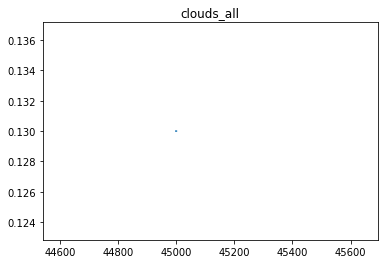

In [34]:
fig, ax = plt.subplots()
ax.plot(df.snow_3h)
ax.set_title('clouds_all')

Text(0.5, 1.0, 'snow_1h')

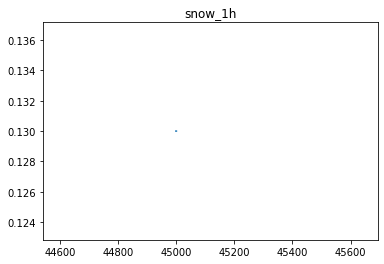

In [35]:
fig, ax = plt.subplots()
ax.plot(df.snow_3h)
ax.set_title('snow_1h')

Text(0.5, 1.0, 'snow_3h')

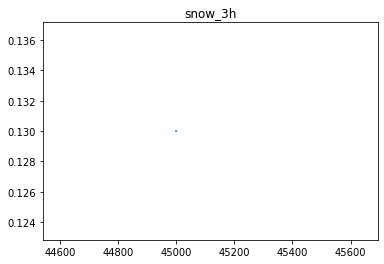

In [36]:
fig, ax = plt.subplots()
ax.plot(df.snow_3h)
ax.set_title('snow_3h')

Text(0.5, 1.0, 'rain+3h')

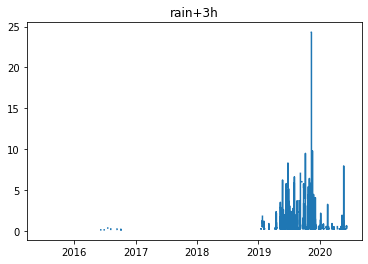

In [29]:
fig, ax = plt.subplots()
ax.plot(df1.rain_1h)
ax.set_title('rain+3h')

Text(0.5, 1.0, 'rain+1h')

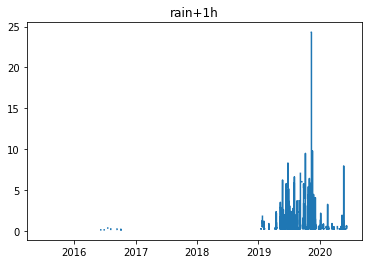

In [28]:
fig, ax = plt.subplots()
ax.plot(df1.rain_1h)
ax.set_title('rain+1h')

Text(0.5, 1.0, 'Temperature')

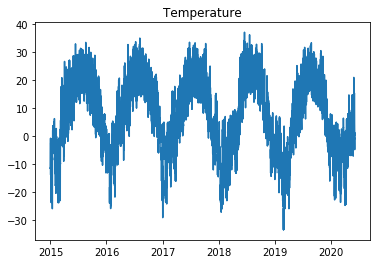

In [177]:
fig, ax = plt.subplots()
ax.plot(df1.temp)
ax.set_title('Temperature')

Text(0.5, 1.0, 'Temperature_Min')

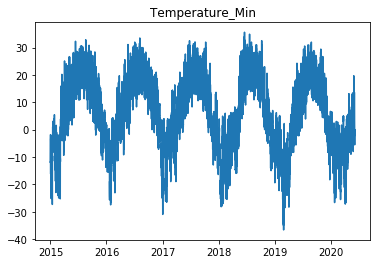

In [165]:
fig, ax = plt.subplots()
ax.plot(df1.temp_min)
ax.set_title('Temperature_Min')

Text(0.5, 1.0, 'Temperature_Max')

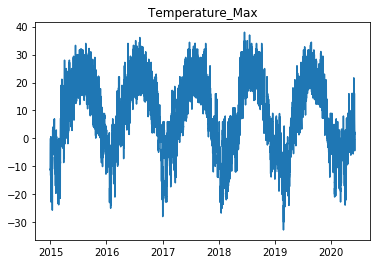

In [80]:
fig, ax = plt.subplots()
ax.plot(df1.temp_max)
ax.set_title('Temperature_Max')

Text(0.5, 1.0, 'Humidity')

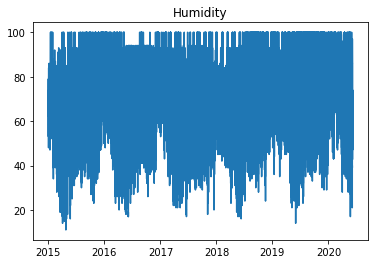

In [81]:
fig, ax = plt.subplots()
ax.plot(df1.humidity)
ax.set_title('Humidity')

Text(0.5, 1.0, 'Pressure')

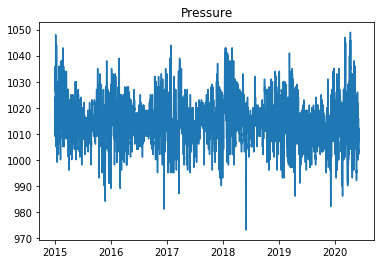

In [82]:
fig, ax = plt.subplots()
ax.plot(df1.pressure)
ax.set_title('Pressure')

In [ ]:
'pressure', 'sea_level',
       'grnd_level', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'snow_1h', 'snow_3h', 'clouds_al

Text(0.5, 1.0, 'wind_speed')

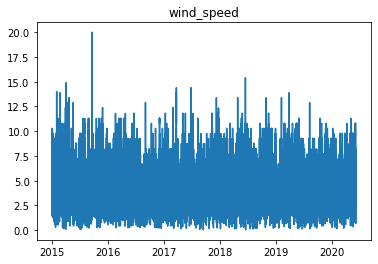

In [83]:
fig, ax = plt.subplots()
ax.plot(df1.wind_speed)
ax.set_title('wind_speed')

Text(0.5, 1.0, 'wind_deg')

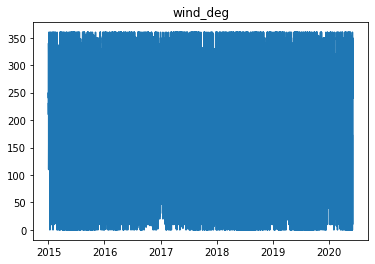

In [84]:
fig, ax = plt.subplots()
ax.plot(df1.wind_deg)
ax.set_title('wind_deg')

Text(0.5, 1.0, 'dew_point')

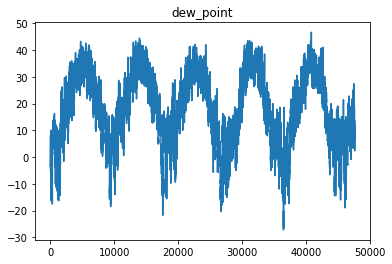

In [98]:
fig, ax = plt.subplots()
ax.plot(dp)
ax.set_title('dew_point')

In [173]:
# Saving datatable into a csv file
df4.to_csv('ConnexusAnokaMN.csv',index=False)